In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [122]:
import nltk
from nltk.corpus import stopwords
import string

In [4]:
messages = [line.rstrip() for line in open('C:/Users/hp/Desktop/DataSets/NLP_IN_Python/SMSSpamCollection')]

In [17]:
messages2  = pd.read_csv('C:/Users/hp/Desktop/DataSets/NLP_IN_Python/SMSSpamCollection', sep = '\t', names = ['label', 'message'] )

In [18]:
messages2.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Exploratory Analysis

Ideas
1. Find the length of all the messages and plot that against HAM/SPAM. Longer messages should be SPAMs.
2. 

In [19]:
messages = messages2

In [20]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
label      5572 non-null object
message    5572 non-null object
dtypes: object(2)
memory usage: 87.1+ KB


In [21]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [26]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [27]:
messages2 = None

In [28]:
del messages2

In [46]:
messages['length'] = messages['message'].apply(len)

In [47]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [48]:
from sklearn.preprocessing import LabelEncoder

In [49]:
label_encoder = LabelEncoder()

In [50]:
messages['label1'] = label_encoder.fit_transform(messages['label'])

In [51]:
messages.head()

,label,message,length,label1
0,ham,"Go until jurong point, crazy.. Available only ...",111,0
1,ham,Ok lar... Joking wif u oni...,29,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,1
3,ham,U dun say so early hor... U c already then say...,49,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,0


In [55]:
messages = messages.drop('label', axis = 1)

In [72]:
messages = messages.rename(columns = {'label1' : 'label'})

In [74]:
messages.head()

,message,length,label
0,"Go until jurong point, crazy.. Available only ...",111,0
1,Ok lar... Joking wif u oni...,29,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,155,1
3,U dun say so early hor... U c already then say...,49,0
4,"Nah I don't think he goes to usf, he lives aro...",61,0


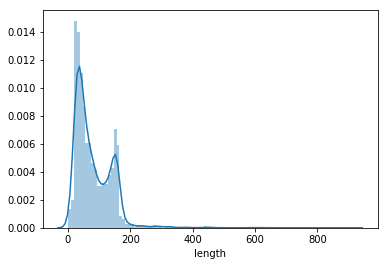

In [83]:
sns.distplot(messages['length'], bins = 100)

## The plot suggests that there are two maxima in the number of words in the messages.

In [86]:
messages.length.describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [92]:
messages[messages['length'] == 910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001B56679B240>,
      dtype=object)

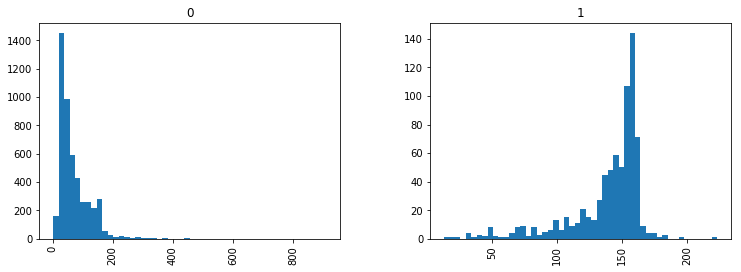

In [107]:
messages.hist(column = 'length', by = 'label', bins = 50,figsize = (12,4 ))

In [111]:
#nltk.download_shell()

## The plot suggests that Ham messages are shorter than the spam messages.

Average Length of Spam = 150, Ham = 50


# Remove Punctuation

In [155]:
a = string.punctuation

In [156]:
b = pd.DataFrame(stopwords.words('english'))

In [157]:
b.count()

0    179
dtype: int64

In [158]:
b

,0
0,i
1,me
2,my
3,myself
4,we
5,our
6,ours
7,ourselves
8,you
9,you're


In [159]:
sample  = 'Sample!!@@#$ messag&&&&'

In [160]:
nopunc = [c for c in sample if c not in a]

In [173]:
sample2 = ''.join(nopunc)

In [174]:
messages['stripped_punc']= messages['message'].apply(lambda x : ''.join ([c for c in x if c not in a]))

In [175]:
messages.head()

,message,length,label,stripped_punc
0,"Go until jurong point, crazy.. Available only ...",111,0,Go until jurong point crazy Available only in ...
1,Ok lar... Joking wif u oni...,29,0,Ok lar Joking wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,155,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,U dun say so early hor... U c already then say...,49,0,U dun say so early hor U c already then say
4,"Nah I don't think he goes to usf, he lives aro...",61,0,Nah I dont think he goes to usf he lives aroun...


# Remove Stopwords

In [176]:
messages['nostop'] =messages['stripped_punc'].apply(split())

NameError: name 'split' is not defined

In [183]:
sample2.append('go')

In [184]:
sample2

['Sample', 'messag', 'go']

In [190]:
def remove_Stopwords (list):
    list = [word for word in list if word not in stopwords.words('english')]
    
    return list

In [191]:
remove_Stopwords(sample2)

['Sample', 'messag', 'go']

In [202]:
messages['message'].apply(remove_Stopwords)

KeyboardInterrupt: 

In [231]:
def text_processing(mess):
    """
    1. Remove Punctuation
    2. Convert to Lowercase
    3. Remove Stopwords
    4. Return list of clean texts
    
    """
    nopunc = [c for c in mess if c not in string.punctuation]
    nopunc = ''.join(nopunc)
    clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    return clean_mess
    #removing stopwords
    
    
    

In [234]:
len(messages)

5572

In [243]:
messages['message'].head(5).apply(text_processing) 

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [247]:
def count(mess):
    a = len(mess.split())
    return a

In [248]:
count(sam)

4

In [250]:
sum1 = 0
for i in range(len(messages)):
    sum1 = sum1+ count(messages['message'][i]) 

In [251]:
sum1

86909

# Vectorization

In [252]:
from sklearn.feature_extraction.text import CountVectorizer

In [253]:
bow_transformer = CountVectorizer(analyzer= text_processing).fit(messages['message'])

In [254]:
type(bow_transformer)

sklearn.feature_extraction.text.CountVectorizer

In [255]:
print(len(bow_transformer.vocabulary_))

11425


In [256]:
mess4 = messages['message'][3]

In [257]:
mess4

'U dun say so early hor... U c already then say...'

In [260]:
bow_transformer.transform([mess4])

<1x11425 sparse matrix of type '<class 'numpy.int64'>'
	with 7 stored elements in Compressed Sparse Row format>

In [262]:
bow4 = bow_transformer.transform([mess4])

In [263]:
print (bow4.shape)

(1, 11425)


In [264]:
print(bow4)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [271]:
bow_transformer.get_feature_names()[9554]

'say'

In [272]:
bow_messages = bow_transformer.transform(messages['message'])

In [273]:
bow_messages.nnz

50548

In [276]:
sparsity = bow_messages.nnz*100/(bow_messages.shape[0]* bow_messages.shape[1])

In [277]:
sparsity

0.07940295412668218

In [279]:
from sklearn.feature_extraction.text import TfidfTransformer

In [280]:
tfidf_transformer = TfidfTransformer().fit(bow_messages)

In [281]:
tfidf4 = tfidf_transformer.transform(bow4)

In [282]:
print(tfidf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [283]:
tfidf = tfidf_transformer.transform(bow_messages)

  (0, 11163)	0.23026685592418913
  (0, 10965)	0.19073428545061483
  (0, 8917)	0.24704652376837993
  (0, 8336)	0.17046869292195632
  (0, 7668)	0.26403384065473806
  (0, 7555)	0.31253856260694546
  (0, 6937)	0.1834692413608692
  (0, 6906)	0.15158474664662352
  (0, 6217)	0.18915557732842803
  (0, 5769)	0.24984711892976424
  (0, 5218)	0.26870593862526665
  (0, 5217)	0.29835184088197164
  (0, 4653)	0.31253856260694546
  (0, 2060)	0.24203960256420656
  (0, 1483)	0.31253856260694546
  (0, 1110)	0.2882862016308418
  (1, 11072)	0.40061560982443056
  (1, 10698)	0.2063637481323008
  (1, 8590)	0.5043405901305854
  (1, 7701)	0.3767401070812794
  (1, 3064)	0.2911995411244838
  (1, 2451)	0.561988811929381
  (2, 11123)	0.19104387220509106
  (2, 11084)	0.15898145347176754
  (2, 10686)	0.13995540820792943
  :	:
  (5568, 6882)	0.31367469776242124
  (5568, 6691)	0.47781076401785183
  (5568, 6354)	0.5575721048646767
  (5568, 4880)	0.3853122086093004
  (5569, 10199)	0.520467167163554
  (5569, 8252)	0.432829

# TFIDF has been calculated. This assigns a weight to each word corresponding to a document

Now we will move on to calculate the prediction. We will use naive bayes for prediction.

In [286]:
from sklearn.naive_bayes import MultinomialNB

In [287]:
spam_detect_model = MultinomialNB()

In [290]:
spam_detect_model.fit(tfidf, messages['label'])

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [293]:
spam_detect_model.predict(tfidf4)[0]

0

In [294]:
all_pred = spam_detect_model.predict(tfidf)

In [295]:
all_pred

array([0, 0, 1, ..., 0, 0, 0])

# We have made prediction on the same training set and that is a blunder. We should split our training set into training and test set.

In [297]:
from sklearn.model_selection import train_test_split

In [300]:
msg_train, msg_test, label_train, label_test = train_test_split(messages['message'], messages['label'], test_size = 0.3)

# We will have to repeat the same process for msg_train which we have done for messages. Instead of repeating the same process we will utilize the sklearn's pipeline capabilities.

In [314]:
from sklearn.pipeline import Pipeline

In [315]:
from sklearn.ensemble import RandomForestClassifier

In [316]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer = text_processing)),
    ('tfidf', TfidfTransformer()),
    ('classifier', RandomForestClassifier())
    
    
])

In [317]:
pipeline.fit(msg_train, label_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_processing at 0x000001B56EE4F1E0>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preproce...obs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [318]:
all_pred = pipeline.predict(msg_test)

In [319]:
from sklearn.metrics import classification_report

In [320]:
print(classification_report(label_test, all_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1440
           1       1.00      0.70      0.83       232

   micro avg       0.96      0.96      0.96      1672
   macro avg       0.98      0.85      0.90      1672
weighted avg       0.96      0.96      0.96      1672

